In [54]:
# We put our code here!

Data Scraping from Yelo

In [7]:
with open('./YelpAPIKeys.txt','r') as f:
    count = 0
    for line in f:
        if count == 0:
            CLIENT_ID = line.strip()
        if count == 1:
            API_KEY = line.strip()
        count+=1

In [8]:
print(CLIENT_ID,"\n",API_KEY)

UFH0gcOYhVYWXEqxTXqoiQ 
 ovv6T1Nhr_IMsxMQWLbe2K1kbo2AELjJ09yqk0VkiZcvdpksEqs1q4SoOpfLLUPxsHHz5tq5_oShbmfunhpn9G2qeY_xeGMqdwgTMYC2sWVXu9uULmqi32aAI-3ZW3Yx


In [9]:
API_HOST = 'https://api.yelp.com' 
SEARCH_PATH = '/v3/businesses/search' 
BUSINESS_PATH = '/v3/businesses/'

In [10]:
!pip install requests

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [11]:
def get_restaurants(api_key,location,number=15):
    import requests
    
    search_data = {
    'term': "restaurant",
    'location': location.replace(' ', '+'),
    'limit': number
    }
    url = API_HOST + SEARCH_PATH
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }
    response = requests.request('GET', url, headers=headers, params=search_data).json()
    businesses = response.get('businesses')
    return businesses

In [27]:
rests = get_restaurants(API_KEY,"Chinatown, New York, NY")
rests

[{'id': 'Lbs8QBRN1U7IYBo5Mcv-RQ',
  'alias': '88-lan-zhou-handmade-noodles-new-york',
  'name': '88 Lan Zhou Handmade Noodles',
  'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/18OSugPW766TSqMxuqc5Ww/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/88-lan-zhou-handmade-noodles-new-york?adjust_creative=UFH0gcOYhVYWXEqxTXqoiQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=UFH0gcOYhVYWXEqxTXqoiQ',
  'review_count': 1568,
  'categories': [{'alias': 'chinese', 'title': 'Chinese'},
   {'alias': 'noodles', 'title': 'Noodles'}],
  'rating': 4.0,
  'coordinates': {'latitude': 40.7155, 'longitude': -73.99675},
  'transactions': [],
  'price': '$',
  'location': {'address1': '40 Bowery St',
   'address2': None,
   'address3': '',
   'city': 'New York',
   'zip_code': '10013',
   'country': 'US',
   'state': 'NY',
   'display_address': ['40 Bowery St', 'New York, NY 10013']},
  'phone': '+16466830939',
  'display_phone': '(646) 683-0939',
  'distance':

In [12]:
!pip install bs4 

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [13]:
from bs4 import BeautifulSoup
import requests

In [14]:
# get all restaurants attributes
# all_rests = dict()
all_rests = list()

for i in rests:
    
    each_rest = dict()
    
    # for attributes from API
#     name = i['name']

    each_rest['name'] = i['name']
    each_rest['categories'] = i['categories']
    each_rest['rating'] = i['rating']
    each_rest['distance'] = i['distance']
    each_rest['is_closed'] = i['is_closed']
    each_rest['location'] = i['location']
    each_rest['phone'] = i['phone']
    
    # for attributes from web scraping url
    url = i['url']
    try: 
        response = requests.get(url)
        results_page = BeautifulSoup(response.content,'lxml') 
        info = results_page.find_all('div',class_="ywidget")[2].find_all('dl')
        
        for i in info:
            r = i.find('dt').get_text().strip(' ')[33:-1]
            v = i.find('dd').get_text().strip(' ')[33:-1]
            each_rest[r] = v

        price = results_page.find_all('div',class_="price-category")[0].find_all('span')[1].get_text()
        
        if price =='$' or price == '$$' or price == '$$$' or price == '$$$$':
            each_rest['price']= price 
            
        else: 
            price = results_page.find_all('div',class_="price-category")[1].find_all('span')[1].get_text()
            each_rest['price']= price 


#         all_rests[name] = each_rest
        all_rests.append(each_rest)
    
    except:
        pass

all_rests

[{'name': "Aunt Jake's",
  'categories': [{'alias': 'italian', 'title': 'Italian'},
   {'alias': 'wine_bars', 'title': 'Wine Bars'},
   {'alias': 'pastashops', 'title': 'Pasta Shops'}],
  'rating': 4.0,
  'distance': 57.26946406082066,
  'is_closed': False,
  'location': {'address1': '149 Mulberry St',
   'address2': None,
   'address3': '',
   'city': 'New York',
   'zip_code': '10013',
   'country': 'US',
   'state': 'NY',
   'display_address': ['149 Mulberry St', 'New York, NY 10013']},
  'phone': '+16468580470',
  'd by Vegans': '',
  'd by Vegetarians': '',
  'Takes Reservations': 'Yes',
  'Delivery': 'Yes',
  'Take-out': 'Yes',
  'Accepts Credit Cards': 'Yes',
  'Accepts Apple Pay': 'No',
  'Accepts Google Pay': 'No',
  'Good For': 'Lunch, Dinner',
  'Parking': 'Street',
  'Bike Parking': 'Yes',
  'Good for Kids': 'Yes',
  'Good for Groups': 'Yes',
  'Attire': 'Casual',
  'Ambience': 'Casual, Trendy',
  'Noise Level': 'Average',
  'Good For Dancing': 'No',
  'Alcohol': 'Beer & Wi

In [64]:
# for algorithm

In [15]:
!pip install pandas
!pip install numpy
!pip install re

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
  Could not find a version that satisfies the requirement re (from versions: )
No matching distribution found for re
You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [16]:
# import user data
import pandas as pd
import numpy
import re

# customer_df.set_index("User", inplace= True)

In [17]:
customer_df = pd.read_csv('preferences.csv', header= 0)
customer_df = customer_df.drop(customer_df.columns[[0,1]], axis=1)
#customer_df = customer_df.drop([0])
#if len(customer_df.columns) > 7:
#    customer_df = customer_df.drop(customer_df.columns[[0]], axis=1)

In [18]:
def to_list(string):
    result = [x.strip() for x in string.split(',')]
    return result

In [19]:
for i in range (len(customer_df.index)):
    customer_df['What categories of food would you like to try?'][i] = to_list(customer_df.iloc[i,1])

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
#normalize all value in dictionary to list use recursion
def flatten(a):
    new_list = []
    if isinstance(a,list):
        for item in a:
        # Look at each item in iterable. 
            if isinstance(item, dict):  
            # If the item is a list, then flatten that list
                flattened_inner_list = flatten(item)
                new_list.extend(flattened_inner_list)
            else:
            # If the item is not a list, just append it to the growing flat list that will be returned.
                new_list.append(item)
    
    if isinstance(a,dict):
        new_list = list(a.values())
    else:
         new_list.append(a)
    return new_list

In [21]:
def if_match(key,preference):
    #rep = r'\b\w+'
    pattern = re.compile(r''+key+'')
    string = preference
    match = pattern.search(string)
    return bool(match)

In [22]:
#score algo blueprint. goddam hard core function.... how to optimize run time?
s = dict()
def score (rests, customer_df):
    
    for i in range (len(rests)): 
        #print(i)
        count_1 = 0
        count_2 = 0
        count_3 = 0
        count_4 = 0
        for key in rests[i].keys():
            for p in range (len(customer_df.columns)):
                #print(key)
                if if_match(key.lower(), customer_df.columns[p].lower()) == True:
                    #print(key)
                    for n in range (len(customer_df.index)):
                    #for v in customer_df.iloc[:,p]:
                        #print(v)
                         
                        if 'price' in customer_df.columns[p]:
                            if len(customer_df.iloc[n,p]) >= len(rests[i].get(key)):
                                count_3 = count_3 + 1
                                #print(count_3)
                                #print(customer_df.iloc[n,p])
                        if 'categories' in customer_df.columns[p]:
                        #if type(customer_df.iloc[n,p]) == list:
                            for m in range (len(customer_df.iloc[n,p])):
                                if customer_df.iloc[n,p][m] in flatten(rests[i].get(key)):
                                    #print(customer_df.iloc[n,p][m])
                                    count_4 = count_4 + 1
                                    #print(count_4)

                        #elif type(customer_df.iloc[n,p]) == numpy.float64:
                        if 'rating' in customer_df.columns[p]:
                            if customer_df.iloc[n,p]<=rests[i].get(key):
                                print('Yes')
                                count_1 = count_1 + 1 
                                print(count_1)
                        
                            
                        else:
                            if customer_df.iloc[n,p] == rests[i].get(key):
                                #print(v)
                                count_2 = count_2 + 1
                                #print(count_2)
                                continue
        count = count_1+count_2+count_3+count_4
        #print(count)
        if rests[i].get('is_closed') == False:
            #s.update({rests[i].get('name'):count})
            s.update({i:count})
    print (s)
    return s

In [24]:
a = score(all_rests, customer_df)

def final(s, rests):
    
    s_sorted = sorted(s, key=s.get, reverse=True)
    df = pd.concat([pd.DataFrame({'name': [rests[r].get('name')],
                   'contact number': [rests[r].get('phone')],
                   'address': [rests[r]['location'].get('display_address')]}) 
        for r in s_sorted], ignore_index=True)
    df = df[['name','contact number','address']]
    df = df.head(3).T
    #print ('Best match for your group')
    return(df)
    
#b = str(final (a,all_rests))
b = final(a,all_rests)

Yes
1
Yes
2
Yes
3
Yes
4
Yes
5
Yes
1
Yes
2
Yes
3
Yes
4
Yes
5
Yes
1
Yes
2
Yes
3
Yes
4
Yes
5
Yes
1
Yes
2
Yes
3
Yes
4
Yes
5
Yes
1
Yes
2
Yes
3
Yes
4
Yes
5
Yes
1
Yes
2
Yes
3
Yes
4
Yes
5
Yes
1
Yes
2
Yes
3
Yes
4
Yes
5
Yes
1
Yes
2
Yes
3
Yes
4
Yes
5
Yes
1
Yes
2
Yes
3
Yes
4
Yes
5
Yes
1
Yes
2
Yes
3
Yes
4
Yes
5
Yes
1
Yes
2
Yes
3
Yes
4
Yes
5
Yes
1
Yes
2
Yes
3
Yes
4
Yes
5
Yes
1
Yes
2
Yes
3
Yes
4
Yes
5
Yes
1
Yes
2
Yes
3
Yes
4
Yes
5
{0: 20, 1: 18, 2: 17, 3: 13, 4: 12, 5: 20, 6: 17, 7: 18, 8: 15, 9: 12, 10: 17, 11: 20, 12: 16, 13: 13}


In [25]:
b

,0,1,2
name,Aunt Jake's,Paesano of Mulberry Street,Sapori D'Italia
contact number,+16468580470,+12129651188,+12127142113
address,"[149 Mulberry St, New York, NY 10013]","[136 Mulberry St, New York, NY 10013]","[105 Mulberry St, New York, NY 10013]"


In [71]:
b.loc['name',0]

"Aunt Jake's"

In [84]:
# get info about ranked restaurant
best_name = b.loc['name',0]
best_contact = b.loc['contact number', 0]
best_address = b.loc['address', 0]
name_rank2 = b.loc['name',1]
name_rank3 = b.loc['name',2]

In [ ]:
# function that get resturants url

In [91]:
def get_url(name):
    for i in rests:
        if name == i['name']:
            url = i['url']
        else:
            pass
    return url

In [72]:
# for sending message to users

In [73]:
!pip install twilio

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [74]:
from twilio.rest import Client

In [75]:
client = Client("AC58e6b883eca330c754e0c1f915aa1f72", "7e67902756dfa25441cfdf633a55e797")
client.messages.create(to="+19095529993",
                       from_="+16162013721",
                       body=b)

<Twilio.Api.V2010.MessageInstance account_sid=AC58e6b883eca330c754e0c1f915aa1f72 sid=SMab87d142160b4d63a937ee056df3e930>

In [93]:
menu = []
#url = 'https://www.yelp.com/biz/the-skylark-new-york?osq=best+rooftop+bars'
url = get_url(best_name)

response = requests.get(url)
results_page = BeautifulSoup(response.content,'lxml') 
menu_items = results_page.find_all('dl',class_="menu-item")
menu_items

for item in menu_items:
    item_name = item.find('a').get_text()
    if item.find('dd') is not None:
        item_price = item.find('dd').get_text()[17:23]
        item_price.strip(' ')
#         print(item_price)
        menu.append((item_name,item_price))

menu

[('Sunday Sauce', '$4.00\n'),
 ('Cavatelli', '$12.00'),
 ('Carbonara', '$3.00\n')]

In [76]:
# scraping resturant comment from web page

In [117]:
comments = []
url = get_url(best_name)
response = requests.get(url)
results_page = BeautifulSoup(response.content,'lxml') 
comments_tag = results_page.find_all('div',class_="review-content")
    
for comment_tag in comments_tag:
    comment = comment_tag.find('p').get_text()
    comments.append(comment)
    
comments

["Me and group of my friends from NYU visited Aunt Jake's on Sunday as a last minute venue for our monthly brunches. \xa0After our wonderful experience and great location, we plan on making this our regular spot for monthly brunches.About the brunch menu, there are a ton of options to choose from, unlike some restaurants, with the option to create your own pasta. \xa0I order the Tall Mimosa, avocado toast, and the pecorino truffle fries. \xa0Everything I ordered was delicious, especially the fries! \xa0In fact, no one at my table had anything negative to say about the food (or service). \xa0It's definitely worth a try if you have never visited. \xa0I think for the quality of the food, the prices are very reasonable. \xa0My group and I are definitely planning to have another brunch at Aunt Jake's next month.",
 'We made reservations but got here way too early. I was pleasantly surprised to see them absolutely crowded with 2 floors now! We waited at the bar ($6 beer) for 30 min, and they

In [118]:
len(comments)

20

In [119]:
comm = ''
for i in range(len(comments)):
    comm += comments[i]
comm

'Me and group of my friends from NYU visited Aunt Jake\'s on Sunday as a last minute venue for our monthly brunches. \xa0After our wonderful experience and great location, we plan on making this our regular spot for monthly brunches.About the brunch menu, there are a ton of options to choose from, unlike some restaurants, with the option to create your own pasta. \xa0I order the Tall Mimosa, avocado toast, and the pecorino truffle fries. \xa0Everything I ordered was delicious, especially the fries! \xa0In fact, no one at my table had anything negative to say about the food (or service). \xa0It\'s definitely worth a try if you have never visited. \xa0I think for the quality of the food, the prices are very reasonable. \xa0My group and I are definitely planning to have another brunch at Aunt Jake\'s next month.We made reservations but got here way too early. I was pleasantly surprised to see them absolutely crowded with 2 floors now! We waited at the bar ($6 beer) for 30 min, and they we

In [110]:
# read NRC data to form an emotion dictionary
nrc = "NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
count=0
emotion_dict=dict()
with open(nrc,'r') as f:
    all_lines = list()
    for line in f:
        if count < 46:
            count+=1
            continue
        line = line.strip().split('\t')
        if int(line[2]) == 1:
            if emotion_dict.get(line[0]):
                emotion_dict[line[0]].append(line[1])
            else:
                emotion_dict[line[0]] = [line[1]]
emotion_dict

{'abacus': ['trust'],
 'abandon': ['fear', 'negative', 'sadness'],
 'abandoned': ['anger', 'fear', 'negative', 'sadness'],
 'abandonment': ['anger', 'fear', 'negative', 'sadness', 'surprise'],
 'abba': ['positive'],
 'abbot': ['trust'],
 'abduction': ['fear', 'negative', 'sadness', 'surprise'],
 'aberrant': ['negative'],
 'aberration': ['disgust', 'negative'],
 'abhor': ['anger', 'disgust', 'fear', 'negative'],
 'abhorrent': ['anger', 'disgust', 'fear', 'negative'],
 'ability': ['positive'],
 'abject': ['disgust', 'negative'],
 'abnormal': ['disgust', 'negative'],
 'abolish': ['anger', 'negative'],
 'abolition': ['negative'],
 'abominable': ['disgust', 'fear', 'negative'],
 'abomination': ['anger', 'disgust', 'fear', 'negative'],
 'abort': ['negative'],
 'abortion': ['disgust', 'fear', 'negative', 'sadness'],
 'abortive': ['negative', 'sadness'],
 'abovementioned': ['positive'],
 'abrasion': ['negative'],
 'abrogate': ['negative'],
 'abrupt': ['surprise'],
 'abscess': ['negative', 'sad

In [111]:
def emotion_analyzer(text,emotion_dict=emotion_dict):
    # get all emotion from dictionary
    emotions = set()
    for y in emotion_dict.values():
        for x in y:
            emotions.add(x)
    # count number of appearance of emotion
    emotion_count = dict()
    for emotion in emotions: 
        emotion_count[emotion] = 0
        
    total_words = len(text.split()) 
    for word in text.split():
        if emotion_dict.get(word):
            for emotion in emotion_dict.get(word):
                emotion_count[emotion] += 1
    
    total_emotion_count = sum(emotion_count.values())
    
    # calculate percentage
    for e in emotion_count:
        emotion_count[e] = emotion_count[e]/total_emotion_count
        
    sorted_by_value = sorted(emotion_count.items(), key=lambda x: x[1],reverse=True)
    
    return sorted_by_value

# check last two lines

In [112]:
comment_emotion = emotion_analyzer(comm)
comment_emotion

[('positive', 0.25806451612903225),
 ('anticipation', 0.19648093841642228),
 ('trust', 0.17008797653958943),
 ('joy', 0.16715542521994134),
 ('negative', 0.07331378299120235),
 ('surprise', 0.05571847507331378),
 ('sadness', 0.02932551319648094),
 ('fear', 0.02346041055718475),
 ('anger', 0.017595307917888565),
 ('disgust', 0.008797653958944282)]

In [113]:
#to catch how much positive comments there are 

def pos_count(text,emotion_dict=emotion_dict):
    # get all emotion from dictionary
    emotions = set()
    for y in emotion_dict.values():
        for x in y:
            emotions.add(x)
    # count number of appearance of emotion
    emotion_count = dict()
    for emotion in emotions: 
        emotion_count[emotion] = 0
        
    total_words = len(text.split()) 
    for word in text.split():
        if emotion_dict.get(word):
            for emotion in emotion_dict.get(word):
                emotion_count[emotion] += 1
    
    total_emotion_count = sum(emotion_count.values())
    
    return emotion_count['positive']



In [114]:
pos_emotion = pos_count(comm)
pos_emotion

88

In [115]:
#to calculate how much more positive the restaurant selected is compared with other restaurants in the area
pos_total = 0 
count = 0

for i in rests:
    
    url = i['url']
    comments = []
    response = requests.get(url)
    results_page = BeautifulSoup(response.content,'lxml') 
    comments_tag = results_page.find_all('div',class_="review-content")
    
    for comment_tag in comments_tag:
        comment = comment_tag.find('p').get_text()
        comments.append(comment)
        
        # generate whole text of comment for word cloud and for emotion analyzer
        comm = ''
        
        for i in range(len(comments)):
            comm += comments[i]
        
    comment_emotion = pos_count(comm) 
    pos_total += comment_emotion
    count += 1 

average_pos = pos_total/count
    

KeyboardInterrupt: 

In [ ]:
# for comment word cloud

In [120]:
!pip install wordcloud
!pip install matplotlib

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


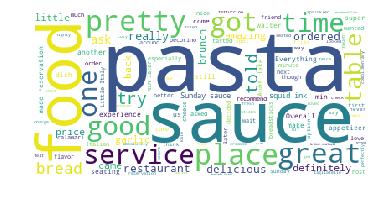

In [121]:
# generate whole text of comment for word cloud and for 
# comm = ''
# for i in range(len(comments)):
#     comm += comments[i]
    
# generate word cloud
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white').generate(comm)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('words.png')

In [85]:
# for resturant location map

In [53]:
!pip install folium

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [56]:
import folium
m = folium.Map(location=[40.8075,-73.9626],zoom_start=14)
folium.Marker([40.8075,-73.9626],popup="Columbia University").add_to(m)
m.save('location.html')
m

In [50]:
!pip install python-docx 

    100% |████████████████████████████████| 5.4MB 247kB/s eta 0:00:01
  Running setup.py install for python-docx ... done
You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [80]:
doc_name = b.loc['name',0]
doc_contact = b.loc['contact number', 0]
doc_address = b.loc['address', 0]
doc_rank2 = b.loc['name',1]
doc_rank3 = b.loc['name',2]

In [82]:
from docx import Document
from docx.shared import Inches

document = Document()

document.add_heading('Based on your group preferences, the best restaurant is:', 1)

document.add_paragraph(f'                                              {doc_name}', style='Intense Quote')


document.add_paragraph(f'Contact number: {doc_contact}', style='List Bullet')
document.add_paragraph(f'Address: {doc_address}', style='List Bullet')
# document.add_paragraph('first item in unordered list', style='List Bullet')
document.add_paragraph(f"Consumers' favorite: {menu}", style='List Bullet')

# document.add_heading('In Map:', level = 2)

document.add_heading('Consumers Who Have Been There Said:', level = 2)
document.add_picture('words.png', width=Inches(5))

# document.add_picture('location.png', width=Inches(1.25))


document.add_heading('In compare to other restaurants in destination:', level = 2)
document.add_paragraph('first item in unordered list')


document.add_heading('Other considerations for your group:', level = 2)
document.add_paragraph(f'{doc_rank2}', style='List Bullet')
document.add_paragraph(f'{doc_rank3}', style='List Bullet')
# document.add_page_break()

document.save('Your Restaurant.docx')